# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pandasql import sqldf
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


## Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Output File (CSV)
output_data_file = "output_data/weather_df.csv"

## Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Define temp_units as Metric type for intuitive ease of understanding data for audience
temp_units = "metric"

## define url+API Key + Temp_Units variable
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

## Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

## Find nearest city with matching lat & lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

## Print the city count to confirm sufficient count
len(cities)
cities

['butaritari',
 'ushuaia',
 'warqla',
 'keflavik',
 'hermanus',
 'saint-philippe',
 'ponta do sol',
 'dikson',
 'khatanga',
 'hobart',
 'lavrentiya',
 'rikitea',
 'agutaya',
 'yellowknife',
 'cape town',
 'egvekinot',
 'torbay',
 'gizo',
 'bredasdorp',
 'pastavy',
 'albany',
 'kavieng',
 'haapiti',
 'ixtapa',
 'ancud',
 'aykhal',
 'twentynine palms',
 'pevek',
 'burica',
 'kapaa',
 'sulangan',
 'trairi',
 'busselton',
 'venado tuerto',
 'siyabuswa',
 'bluff',
 'yulara',
 'duz',
 'namatanai',
 'salinas',
 'tura',
 'cidreira',
 'lebu',
 'springbok',
 'thinadhoo',
 'tateyama',
 'hammerfest',
 'vaini',
 'komsomolskiy',
 'san quintin',
 'alzamay',
 'ous',
 'kajiado',
 'norwich',
 'new norfolk',
 'castro',
 'jamestown',
 'yanam',
 'tezu',
 'chokurdakh',
 'port alfred',
 'warri',
 'saint-pierre',
 'puerto carreno',
 'barguzin',
 'leshukonskoye',
 'vila velha',
 'bose',
 'carutapera',
 'urusha',
 'letka',
 'ribeira grande',
 'hasaki',
 'arraial do cabo',
 'ugoofaaru',
 'saskylakh',
 'lata',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
## Establish lists for the dataframe
city_2 = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

## Establish initial count quantities for organization
count_one = 0
set_one = 1

## Estalblish loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_2.append(city)
        else:
            count_one += 1
            city_2.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found... Going to next available City...")
print("-------------\nData Retrieval Complete\n-------------")    

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ushuaia
City not found... Going to next available City...
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | agutaya
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | egvekinot
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | gizo
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | pastavy
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | haapiti
Processing Record 23 of Set 1 | ixtapa
Processing Reco

City not found... Going to next available City...
Processing Record 31 of Set 4 | talas
Processing Record 32 of Set 4 | padang
Processing Record 33 of Set 4 | faanui
City not found... Going to next available City...
Processing Record 34 of Set 4 | husavik
Processing Record 35 of Set 4 | xingyi
Processing Record 36 of Set 4 | sirjan
Processing Record 37 of Set 4 | mehamn
Processing Record 38 of Set 4 | kushima
Processing Record 39 of Set 4 | kieta
Processing Record 40 of Set 4 | kantilo
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | balabac
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | quzhou
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | olafsvik
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | weligama
Processing Record 3 of Set 5 | provideniya
Processi

Processing Record 48 of Set 7 | takoradi
City not found... Going to next available City...
Processing Record 49 of Set 7 | touho
Processing Record 1 of Set 8 | brainerd
Processing Record 2 of Set 8 | kongolo
Processing Record 3 of Set 8 | antofagasta
Processing Record 4 of Set 8 | novoagansk
Processing Record 5 of Set 8 | upata
Processing Record 6 of Set 8 | caravelas
Processing Record 7 of Set 8 | tabory
Processing Record 8 of Set 8 | tilichiki
Processing Record 9 of Set 8 | nuuk
Processing Record 10 of Set 8 | vao
Processing Record 11 of Set 8 | west wendover
Processing Record 12 of Set 8 | mareeba
Processing Record 13 of Set 8 | lorengau
Processing Record 14 of Set 8 | dukat
City not found... Going to next available City...
Processing Record 15 of Set 8 | mackay
Processing Record 16 of Set 8 | shenjiamen
Processing Record 17 of Set 8 | djambala
Processing Record 18 of Set 8 | harper
Processing Record 19 of Set 8 | muyezerskiy
Processing Record 20 of Set 8 | mount isa
Processing Reco

Processing Record 24 of Set 11 | swan hill
City not found... Going to next available City...
Processing Record 25 of Set 11 | pimenta bueno
Processing Record 26 of Set 11 | kerema
Processing Record 27 of Set 11 | miramar
Processing Record 28 of Set 11 | iquitos
Processing Record 29 of Set 11 | maniitsoq
Processing Record 30 of Set 11 | msanga
City not found... Going to next available City...
Processing Record 31 of Set 11 | voh
Processing Record 32 of Set 11 | kwekwe
Processing Record 33 of Set 11 | ishurdi
Processing Record 34 of Set 11 | khani
Processing Record 35 of Set 11 | nambucca heads
Processing Record 36 of Set 11 | pimentel
Processing Record 37 of Set 11 | port macquarie
Processing Record 38 of Set 11 | leh
Processing Record 39 of Set 11 | alekseyevsk
Processing Record 40 of Set 11 | nizhniy odes
Processing Record 41 of Set 11 | port pirie
Processing Record 42 of Set 11 | chitral
Processing Record 43 of Set 11 | tahe
Processing Record 44 of Set 11 | ban pong
Processing Record

In [4]:
## Create a dictionary for establishing dataframe
weather_dict = {
    "City":city_2,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

## Establish weather df
weather_df = pd.DataFrame(weather_dict)

## Output data to csv
weather_df.to_csv(output_data_file)
weather_df.count()
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,100,KI,1640582852,75,3.0707,172.7902,28.07,5.05
1,ushuaia,75,AR,1640582750,57,-54.8000,-68.3000,8.81,6.17
2,keflavik,75,IS,1640582854,80,64.0049,-22.5624,-0.63,1.54
3,hermanus,51,ZA,1640582855,88,-34.4187,19.2345,17.72,3.69
4,saint-philippe,82,RE,1640582821,87,-21.3585,55.7679,27.75,5.84
5,ponta do sol,41,PT,1640582856,81,38.7333,-28.2667,15.05,16.07
6,dikson,79,RU,1640582857,85,73.5069,80.5464,-20.39,10.32
7,khatanga,45,RU,1640582857,100,71.9667,102.5000,-37.37,1.45
8,hobart,20,AU,1640582858,54,-42.8794,147.3294,19.59,0.45
9,lavrentiya,17,RU,1640582741,83,65.5833,-171.0000,-23.30,3.28


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
## SQL query to interrogate data for humidity levels over 100.

q = "SELECT * FROM weather_df where weather_df.Humidity > 100"
sqldf(q, globals())

## Step Skipped due to no data points existing over 100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

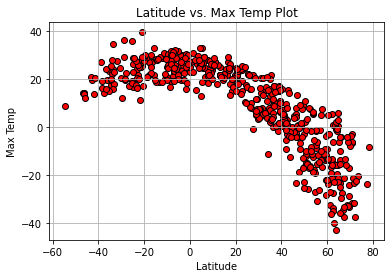

In [8]:
## Establish XY variables for scatter plot
latitude = weather_df['Lat']
max_temp = weather_df['Max Temp']

## Display scatter plot
plt.scatter(latitude, max_temp, marker="o", facecolors="red", edgecolors="black")

## Add labels,title and grid to plot
plt.title("Latitude vs. Max Temp Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)


## Save the output image
plt.savefig("output_data/Scat_Fig1.png")

## Display plot
plt.show()

## Latitude vs. Humidity Plot

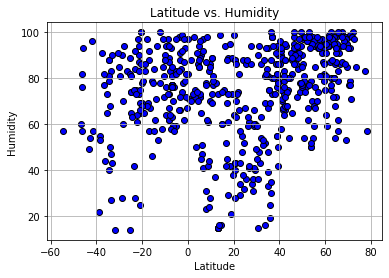

In [9]:
## Establish XY variables for scatter plot
latitude = weather_df['Lat']
humidity1 = weather_df['Humidity']

## Display scatter plot
plt.scatter(latitude, humidity1, marker="o", facecolors="blue", edgecolors="black")

## Add labels,title and grid to plot
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

## Save the output image
plt.savefig("output_data/Scat_Fig2.png")

## Display plot
plt.show()

## Latitude vs. Cloudiness Plot

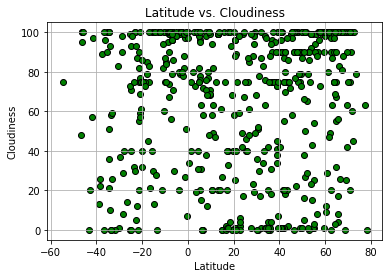

In [10]:
## Establish XY variables for scatter plot
latitude = weather_df['Lat']
cloudiness1 = weather_df['Cloudiness']

## Display scatter plot
plt.scatter(latitude, cloudiness1, marker="o", facecolors="green", edgecolors="black")

## Add labels,title and grid to plot
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

## Save the output image
plt.savefig("output_data/Scat_Fig3.png")

## Display plot
plt.show()

## Latitude vs. Wind Speed Plot

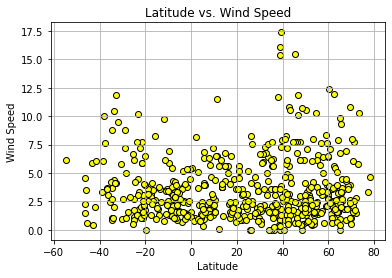

In [11]:
## Establish XY variables for scatter plot
latitude = weather_df['Lat']
wind_speed1 = weather_df['Wind Speed']

## Display scatter plot
plt.scatter(latitude, wind_speed1, marker="o", facecolors="yellow", edgecolors="black")

## Add labels,title and grid to plot
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

## Save the output image
plt.savefig("output_data/Scat_Fig4.png")

## Display plot
plt.show()

## Linear Regression

In [12]:
## Filter results for Cities in Northern Hemisphere (Where Lat is > 0)
pysqldf = lambda q: sqldf(q, globals())
"SELECT * FROM weather_df where weather_df.Humidity > 100"
northern_df = "SELECT * FROM weather_df where weather_df.Lat > 0 order by weather_df.[Max Temp] desc"
southern_df = "SELECT * FROM weather_df where weather_df.Lat < 0 order by weather_df.[Max Temp] desc"

## Define Northern Hemisphere Filtered dataframes
northern_lat_df = "SELECT weather_df.lat FROM weather_df where weather_df.Lat > 0"
northern_temp_df = "SELECT weather_df.[Max Temp] FROM weather_df where weather_df.Lat > 0"
northern_humidity_df = "SELECT weather_df.Humidity FROM weather_df where weather_df.Lat > 0"
northern_cloudiness_df = "SELECT weather_df.Cloudiness FROM weather_df where weather_df.Lat > 0"
northern_wind_speed_df = "SELECT weather_df.[Wind Speed] FROM weather_df where weather_df.Lat > 0"

## Define Southern Hemisphere Filtered dataframes
southern_lat_df = "SELECT weather_df.lat FROM weather_df where weather_df.Lat < 0"
southern_temp_df = "SELECT weather_df.[Max Temp] FROM weather_df where weather_df.Lat < 0"
southern_humidity_df = "SELECT weather_df.Humidity FROM weather_df where weather_df.Lat < 0"
southern_cloudiness_df = "SELECT weather_df.Cloudiness FROM weather_df where weather_df.Lat < 0"
southern_wind_speed_df = "SELECT weather_df.[Wind Speed] FROM weather_df where weather_df.Lat < 0"

## Print Norther Hemisphere Data Frame
pysqldf(northern_df)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lumut,40,MY,1640583143,70,4.2323,100.6298,33.20,1.03
1,georgetown,20,MY,1640582726,72,5.4112,100.3354,32.96,4.12
2,kuching,40,MY,1640583052,70,1.5500,110.3333,31.12,1.03
3,kuala terengganu,19,ID,1640583090,50,3.3770,98.6189,29.61,2.17
4,weligama,0,LK,1640583001,47,5.9667,80.4167,29.36,3.98
...,...,...,...,...,...,...,...,...,...
387,mokhsogollokh,100,RU,1640583235,98,61.4681,128.9203,-36.27,0.60
388,khatanga,45,RU,1640582857,100,71.9667,102.5000,-37.37,1.45
389,verkhoyansk,100,RU,1640582911,100,67.5447,133.3850,-37.55,0.85
390,myaundzha,63,RU,1640583232,97,63.0494,147.1858,-39.79,1.80


####  Establish function for plotting Linear Regression

In [13]:
def plotting_lin_reg(x,y,xlabel,ylabel,labelpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    print(f"The r-squared is: {rvalue**2}")
    print(f"The r-value is: {rvalue}")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.756812848427228
The r-value is: -0.8699499114473361
The correlation between both factors is -0.87


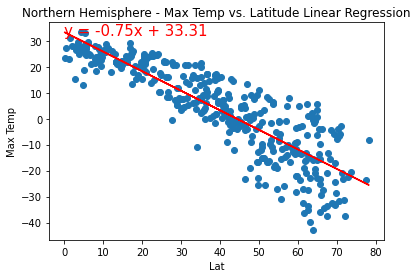

In [14]:
## Filter Dataframe results for linear Regression
lat_n_1 = pysqldf(northern_lat_df)
max_temp_n_1 = pysqldf(northern_temp_df)
lr_df1 = pd.merge(lat_n_1, max_temp_n_1,left_index=True,right_index=True)
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
ifig = 1

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0,32)
plotting_lin_reg(lr_df1[xlabel],lr_df1[ylabel],xlabel,ylabel,labelpos,5)

plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.18453494322352176
The r-value is: 0.42957530564910473
The correlation between both factors is 0.43


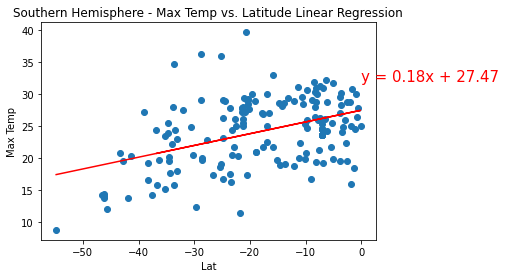

In [15]:
## Filter Dataframe results for linear Regression
lat_s_1 = pysqldf(southern_lat_df)
max_temp_s_1 = pysqldf(southern_temp_df)
lr_df2 = pd.merge(lat_s_1, max_temp_s_1,left_index=True,right_index=True)
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
ifig = 2

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0,32)
plotting_lin_reg(lr_df2[xlabel],lr_df2[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17676749328628805
The r-value is: 0.42043726438826523
The correlation between both factors is 0.42


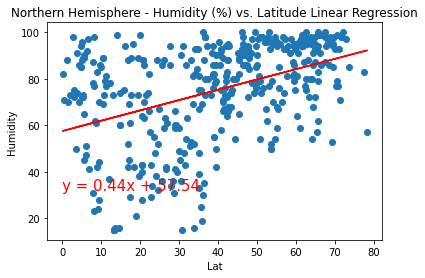

In [16]:
## Filter Dataframe results for linear Regression
lat_n_1 = pysqldf(northern_lat_df)
humidity_n_1 = pysqldf(northern_humidity_df)
lr_df3 = pd.merge(lat_n_1, humidity_n_1,left_index=True,right_index=True)
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
ifig = 3

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (0,32)
plotting_lin_reg(lr_df3[xlabel],lr_df3[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08527187625365233
The r-value is: 0.29201348642426145
The correlation between both factors is 0.29


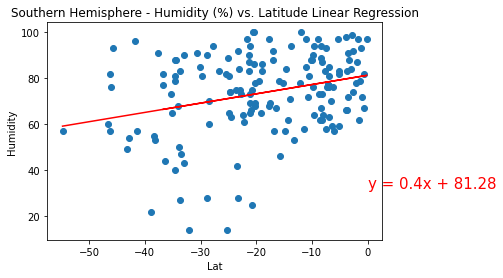

In [17]:
## Filter Dataframe results for linear Regression
lat_s_1 = pysqldf(southern_lat_df)
humidity_s_1 = pysqldf(southern_humidity_df)
lr_df4 = pd.merge(lat_s_1, humidity_s_1,left_index=True,right_index=True)
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
ifig = 4

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (0,32)
plotting_lin_reg(lr_df4[xlabel],lr_df4[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0266556884053745
The r-value is: 0.16326569880221167
The correlation between both factors is 0.16


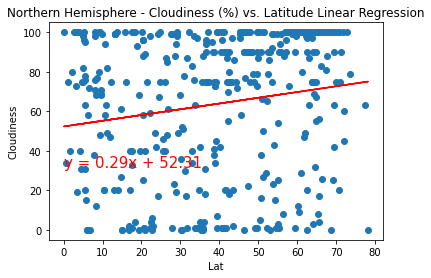

In [18]:
## Filter Dataframe results for linear Regression
lat_n_1 = pysqldf(northern_lat_df)
cloudiness_n_1 = pysqldf(northern_cloudiness_df)
lr_df5 = pd.merge(lat_n_1, cloudiness_n_1,left_index=True,right_index=True)
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
ifig = 5


# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (0,32)
plotting_lin_reg(lr_df5[xlabel],lr_df5[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06704952964406434
The r-value is: -0.25893923928996226
The correlation between both factors is -0.26


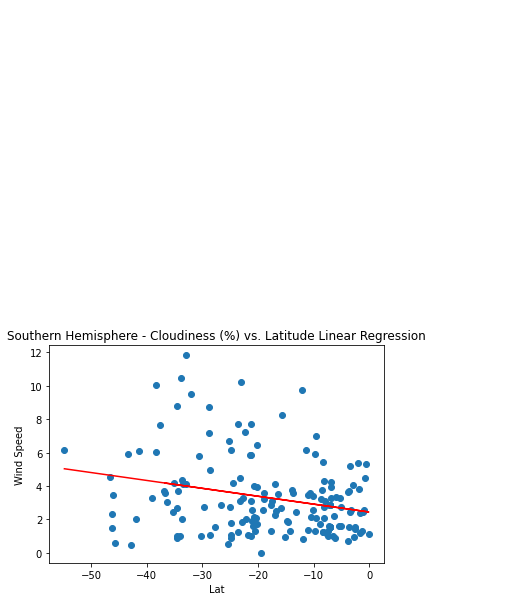

In [19]:
## Filter Dataframe results for linear Regression
lat_s_1 = pysqldf(southern_lat_df)
wind_speed_s_1 = pysqldf(southern_wind_speed_df)
lr_df6 = pd.merge(lat_s_1, wind_speed_s_1,left_index=True,right_index=True)
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
ifig = 6

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (0,32)
plotting_lin_reg(lr_df6[xlabel],lr_df6[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00218181988607158
The r-value is: -0.046709954892630544
The correlation between both factors is -0.05


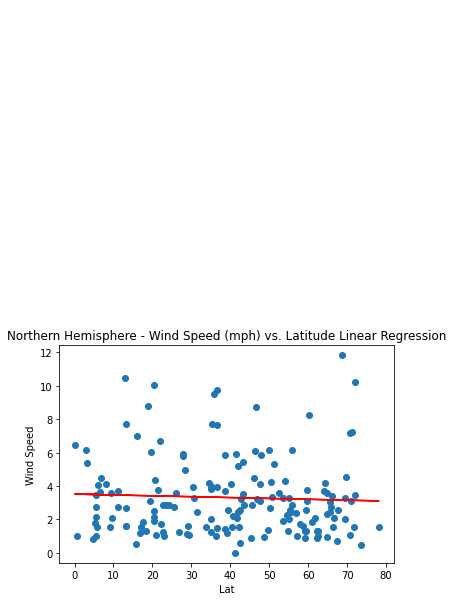

In [20]:
## Filter Dataframe results for linear Regression
lat_n_1 = pysqldf(northern_lat_df)
wind_speed_n_1 = pysqldf(northern_wind_speed_df)
lr_df7 = pd.merge(lat_n_1, wind_speed_s_1,left_index=True,right_index=True)
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
ifig = 7

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (0,32)
plotting_lin_reg(lr_df7[xlabel],lr_df7[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06704952964406434
The r-value is: -0.25893923928996226
The correlation between both factors is -0.26


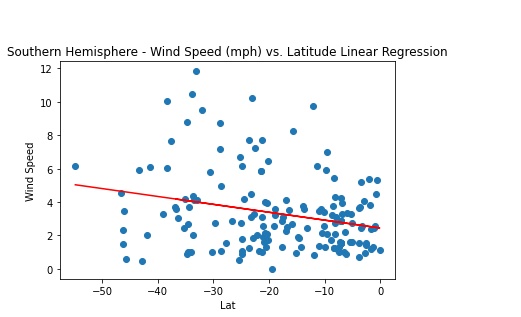

In [21]:
## Filter Dataframe results for linear Regression
lat_s_1 = pysqldf(southern_lat_df)
wind_speed_s_1 = pysqldf(southern_wind_speed_df)
lr_df8 = pd.merge(lat_s_1, wind_speed_s_1,left_index=True,right_index=True)
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
ifig = 8

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (0,15)
plotting_lin_reg(lr_df8[xlabel],lr_df8[ylabel],xlabel,ylabel,labelpos,5)
plt.savefig(f"output_data/lin_reg_fig{ifig}.png")
plt.show()
